### Task-01 

Distribution of Population by Country in 2023

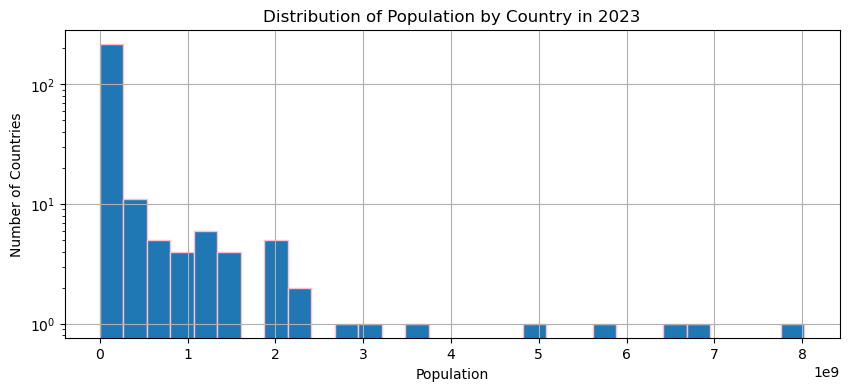

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# Extract population data for the year 2023
population_2023 = df[df['Indicator Name'] == 'Population, total']['2023'].dropna()

# Create a histogram to visualize the distribution of the population in 2023
plt.figure(figsize=(10, 4))
plt.hist(population_2023, bins=30, edgecolor='pink')
plt.title('Distribution of Population by Country in 2023')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.yscale('log')  # Use a logarithmic scale for better visibility
plt.grid(True)
plt.show()


Population of Afghanistan from 1960 to 2022

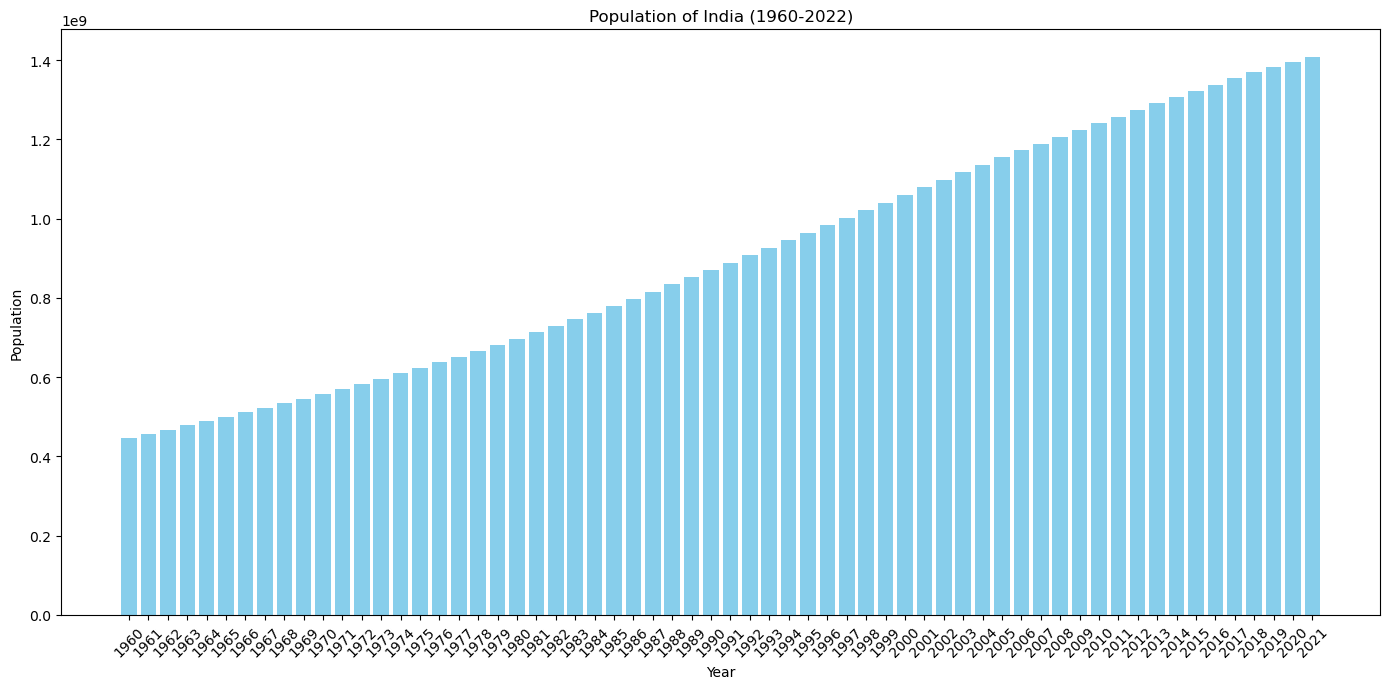

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# Select data for Afghanistan
India_data = df[(df['Country Name'] == 'India') & (df['Indicator Name'] == 'Population, total')].iloc[0, 4:-2]

# Convert the series to numeric values and drop NaNs
India_data = pd.to_numeric(India_data, errors='coerce').dropna()

# Plotting the population data over the years
plt.figure(figsize=(14, 7))
plt.bar(India_data.index, India_data.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of India (1960-2022)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


Population Comparison of Multiple Countries in 2023

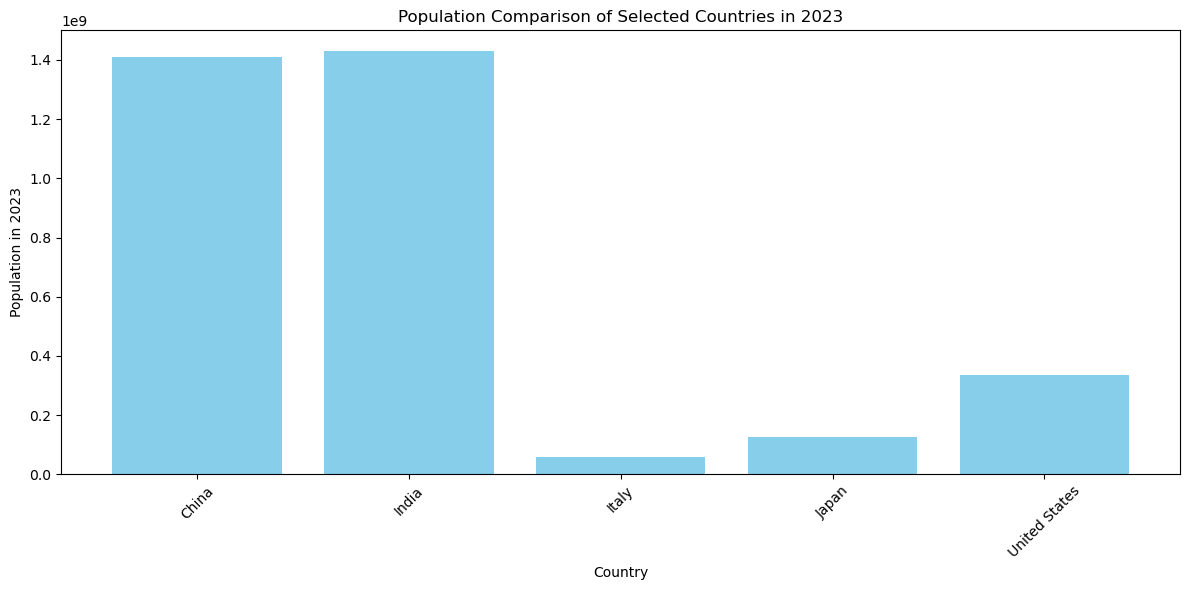

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# List of countries to compare
countries = ['Italy', 'India', 'United States', 'China', 'Japan']

# Select population data for the year 2023
population_2023 = df[(df['Country Name'].isin(countries)) & (df['Indicator Name'] == 'Population, total')][['Country Name', '2023']]

# Plotting the population data
plt.figure(figsize=(12, 6))
plt.bar(population_2023['Country Name'], population_2023['2023'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population in 2023')
plt.title('Population Comparison of Selected Countries in 2023')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


Population Growth Over Time for Multiple Countries

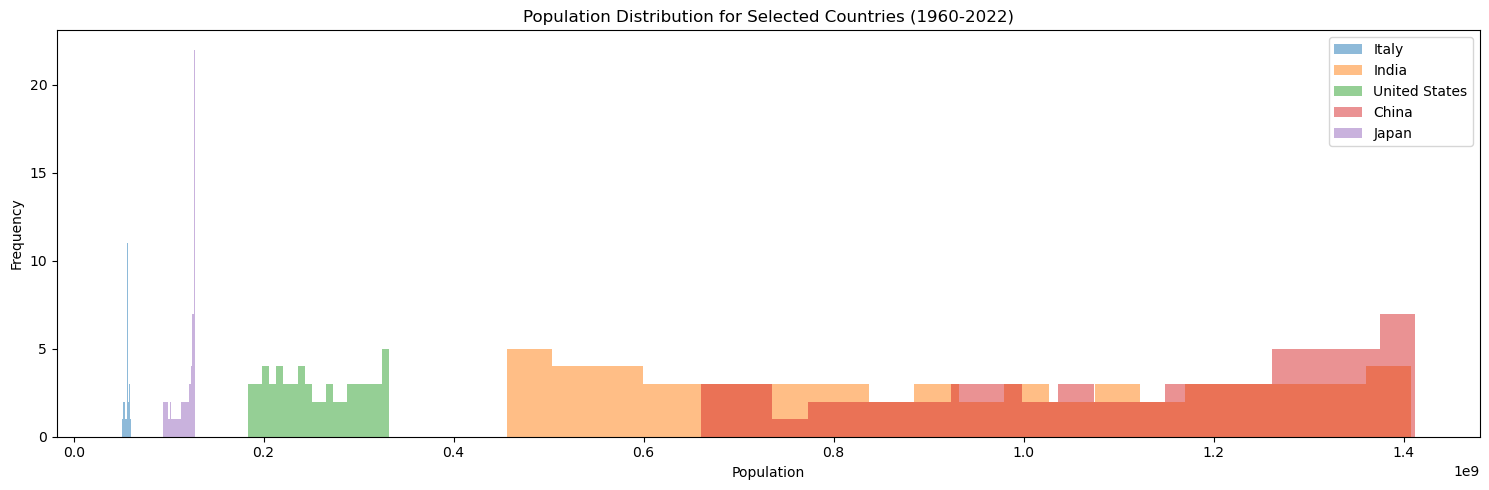

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# List of countries to compare
countries = ['Italy', 'India', 'United States', 'China', 'Japan']

# Select population data for the chosen countries
population_data = df[(df['Country Name'].isin(countries)) & (df['Indicator Name'] == 'Population, total')].set_index('Country Name')

# Years to include in the plot
years = population_data.columns[4:-2]

# Plotting the population data as histograms over the years
plt.figure(figsize=(15, 5))

for country in countries:
    country_data = pd.to_numeric(population_data.loc[country, years], errors='coerce').dropna()
    plt.hist(country_data.values, bins=20, alpha=0.5, label=country)

plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution for Selected Countries (1960-2022)')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


Population Distribution Analysis of Selected Countries (1960-2022)

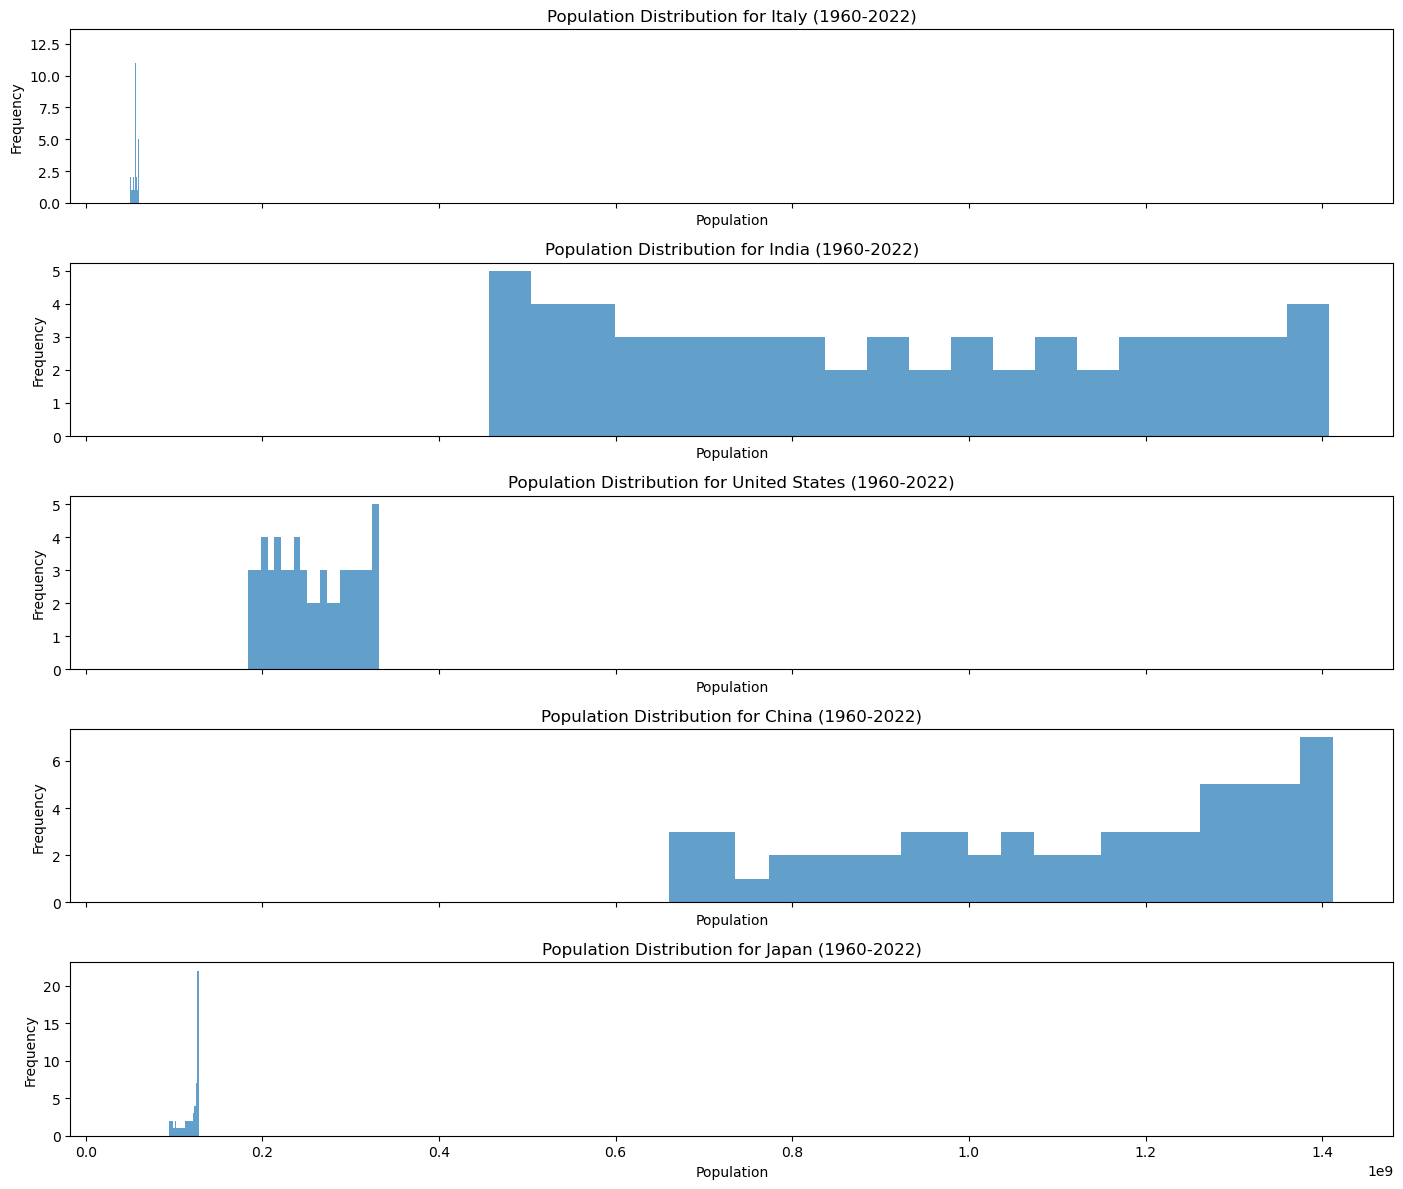

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# List of countries to compare
countries = ['Italy', 'India', 'United States', 'China', 'Japan']

# Select population data for the chosen countries
population_data = df[(df['Country Name'].isin(countries)) & (df['Indicator Name'] == 'Population, total')].set_index('Country Name')

# Years to include in the plot
years = population_data.columns[4:-2]

# Plotting the population data as histograms over the years
fig, axes = plt.subplots(len(countries), 1, figsize=(14, 12), sharex=True)

for i, country in enumerate(countries):
    country_data = pd.to_numeric(population_data.loc[country, years], errors='coerce').dropna()
    axes[i].hist(country_data.values, bins=20, alpha=0.7)
    axes[i].set_title(f'Population Distribution for {country} (1960-2022)')
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Population Trend of a Single Country

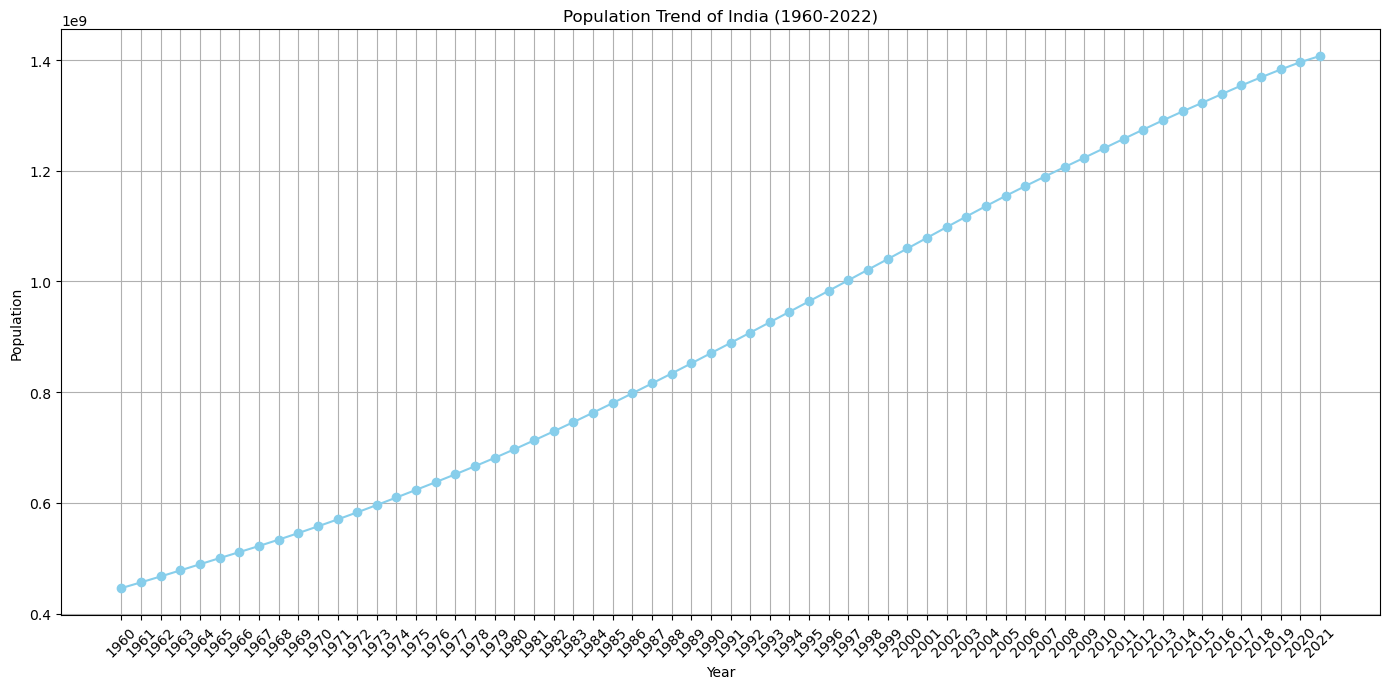

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# Select data for a single country (e.g., India)
country_name = 'India'
country_data = df[(df['Country Name'] == country_name) & (df['Indicator Name'] == 'Population, total')].iloc[0, 4:-2]

# Convert the series to numeric values and drop NaNs
country_data = pd.to_numeric(country_data, errors='coerce').dropna()

# Plotting the population trend over the years
plt.figure(figsize=(14, 7))
plt.plot(country_data.index, country_data.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population Trend of {country_name} (1960-2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


Population Comparison Using Boxplot

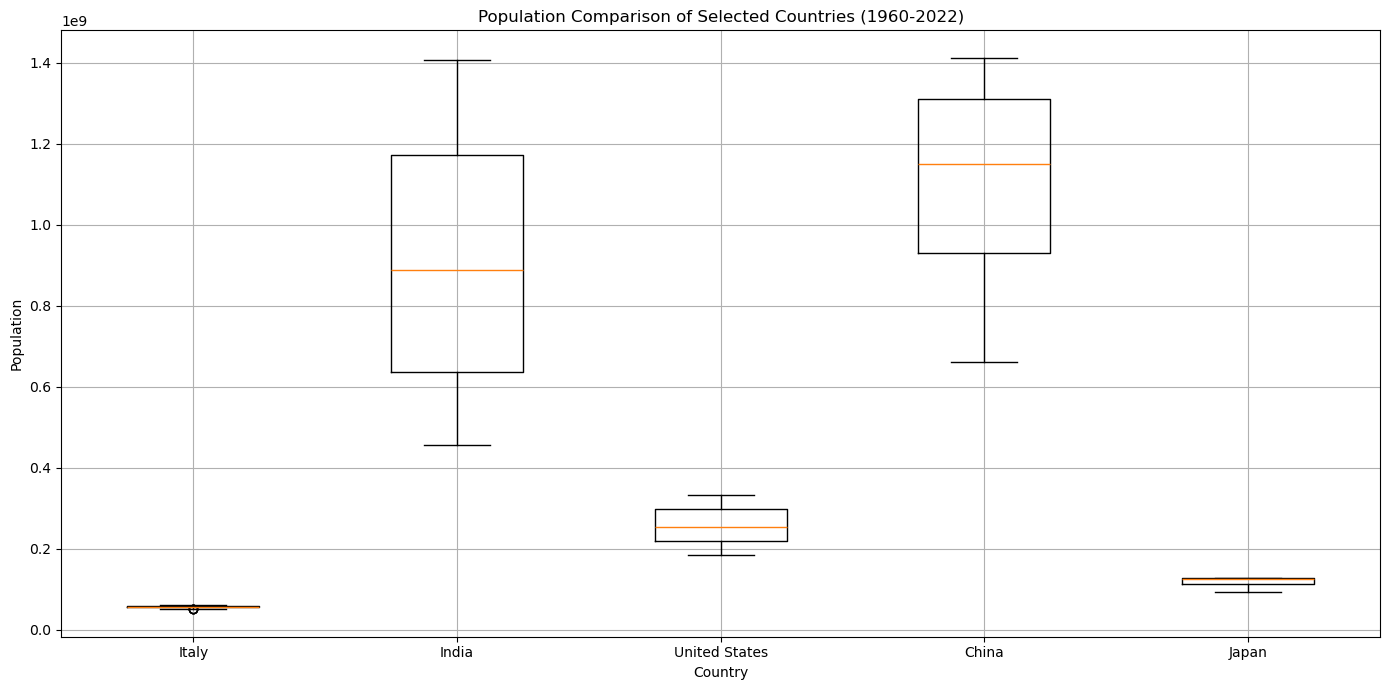

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# List of countries to compare
countries = ['Italy', 'India', 'United States', 'China', 'Japan']

# Select population data for the chosen countries
population_data = df[(df['Country Name'].isin(countries)) & (df['Indicator Name'] == 'Population, total')].set_index('Country Name')

# Years to include in the plot
years = population_data.columns[4:-2]

# Prepare data for boxplot
boxplot_data = []

for country in countries:
    country_data = pd.to_numeric(population_data.loc[country, years], errors='coerce').dropna()
    boxplot_data.append(country_data.values)

# Plotting the boxplot
plt.figure(figsize=(14, 7))
plt.boxplot(boxplot_data, labels=countries)
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population Comparison of Selected Countries (1960-2022)')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


Population Distribution by Continent in 2020

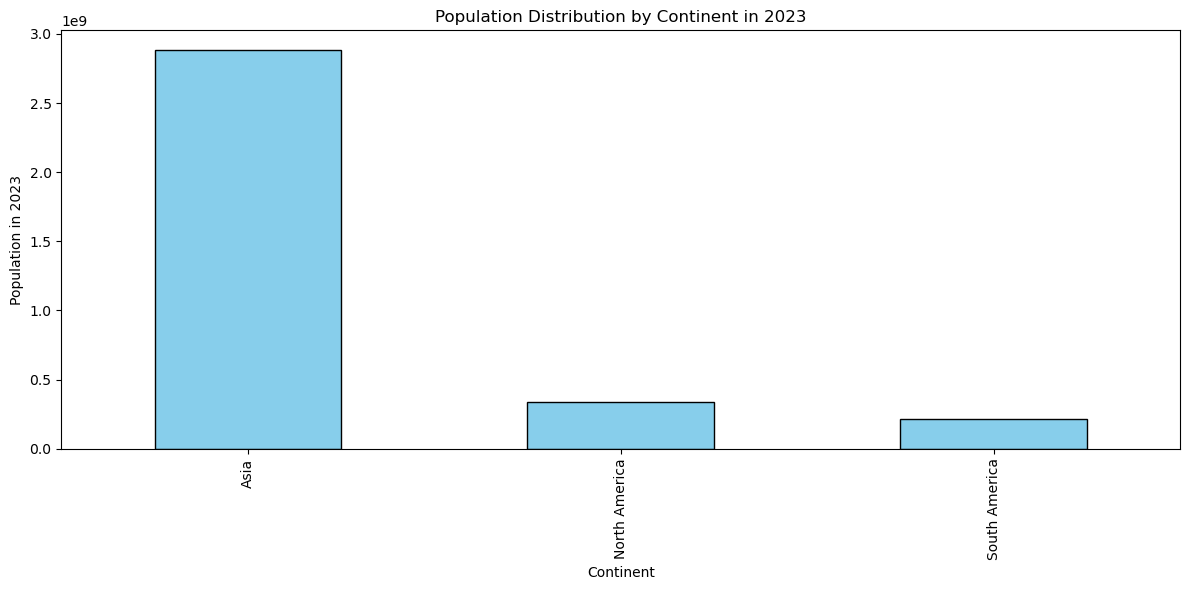

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path =  "C:/Users/DELL/Downloads/API_SP.POP.TOTL_DS2_en_excel_v2_203.xls"
excel_data = pd.ExcelFile(file_path, engine='xlrd')

# Load the 'Data' sheet into a DataFrame
df = excel_data.parse('Data', skiprows=3)

# Drop unnecessary rows and columns
df = df.drop([0, 1])  # Drop rows with metadata
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Rename columns to more meaningful names
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df.columns[4:])

# Add a column for Continent (this step assumes you have a way to map countries to continents)
continent_mapping = {
    'Afghanistan': 'Asia',
    'India': 'Asia',
    'United States': 'North America',
    'China': 'Asia',
    'Brazil': 'South America',
    # Add other mappings as needed
}

df['Continent'] = df['Country Name'].map(continent_mapping)

# Select population data for the year 2023
population_2023 = df[df['Indicator Name'] == 'Population, total'][['Country Name', '2023', 'Continent']].dropna()

# Aggregate population by continent
population_by_continent = population_2023.groupby('Continent')['2023'].sum()

# Plotting the population distribution by continent
plt.figure(figsize=(12, 6))
population_by_continent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Population in 2023')
plt.title('Population Distribution by Continent in 2023')
plt.tight_layout()

# Display the plot
plt.show()
